<a href="https://colab.research.google.com/github/Erenkardogan/SmiLe/blob/main/ANN(DER%C4%B0N_MODEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
positive_path = '/content/drive/MyDrive/SMILEs/positives/positives7'
negative_path = '/content/drive/MyDrive/SMILEs/negatives/negatives7'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
    return images

pos_images = load_images_from_folder(positive_path)
neg_images = load_images_from_folder(negative_path)

In [ ]:
# Verileri etiketliyoruz
pos_labels = [1] * len(pos_images)
neg_labels = [0] * len(neg_images)

In [ ]:
from sklearn.model_selection import train_test_split

images = pos_images + neg_images
labels = pos_labels + neg_labels

images = np.array(images)
labels = np.array(labels)

print(images.shape)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

(13165, 64, 64)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 4096)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               524416    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 2)                 66        
                                                                 
Total params: 534818 (2.04 MB)
Trainable params: 534818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
H = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
330/330 [==============================] - 5s 12ms/step - loss: 0.5283 - accuracy: 0.7468 - val_loss: 0.3998 - val_accuracy: 0.8291
Epoch 2/10
330/330 [==============================] - 3s 9ms/step - loss: 0.4071 - accuracy: 0.8109 - val_loss: 0.4274 - val_accuracy: 0.7983
Epoch 3/10
330/330 [==============================] - 3s 9ms/step - loss: 0.3835 - accuracy: 0.8299 - val_loss: 0.3584 - val_accuracy: 0.8561
Epoch 4/10
330/330 [==============================] - 3s 10ms/step - loss: 0.3578 - accuracy: 0.8394 - val_loss: 0.3473 - val_accuracy: 0.8572
Epoch 5/10
330/330 [==============================] - 4s 13ms/step - loss: 0.3633 - accuracy: 0.8406 - val_loss: 0.3843 - val_accuracy: 0.8306
Epoch 6/10
330/330 [==============================] - 3s 9ms/step - loss: 0.3518 - accuracy: 0.8431 - val_loss: 0.3898 - val_accuracy: 0.8359
Epoch 7/10
330/330 [==============================] - 3s 8ms/step - loss: 0.3438 - accuracy: 0.8508 - val_loss: 0.3437 - val_accuracy: 0.8595
Epo

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

83/83 - 0s - loss: 0.3251 - accuracy: 0.8644 - 207ms/epoch - 2ms/step
Test accuracy: 0.8644132018089294


In [ ]:
predictions = model.predict(X_test)
print(X_test.shape)

83/83 [==============================] - 0s 3ms/step
(2633, 64, 64)


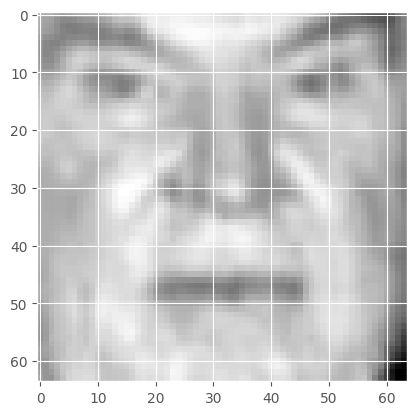

guess:  0
%:  [79 21]


In [ ]:
plt.imshow(X_test[0].reshape(64, 64), cmap='gray')
plt.show()

preds = predictions[1]
guess = np.argmax(preds)
perc = np.rint(preds * 100).astype(int)

print('guess: ', guess)
print('%: ', perc)

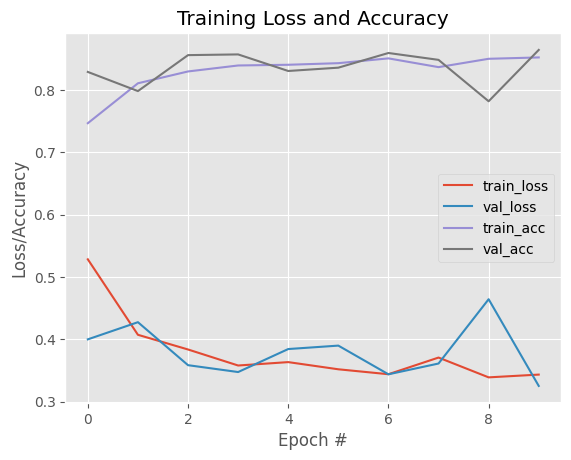

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()